In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

<ipython-input-1-c852ab0c67f9>:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
import pandas as pd
import io
import os
import pyarrow.parquet as pq
import numpy as np
import glob
import json

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

# Loading data

In [43]:
path_to_json = '../hotelBeds/hotels.dev/'
json_pattern = os.path.join(path_to_json,'*.json')
file_list = glob.glob(json_pattern)

In [42]:
temp_inventory = []
for file in file_list:
    with open(file) as f:
        data = json.load(f)
        hotels = pd.DataFrame.from_dict(pd.json_normalize(data["hotels"]), orient="columns")
    temp_inventory.append(hotels)
inventory = pd.concat(temp_inventory, ignore_index=True) # concatenate all the data frames in the list.

In [6]:
inventory

,code,countryCode,stateCode,destinationCode,zoneCode,categoryCode,categoryGroupCode,accommodationTypeCode,boardCodes,segmentCodes,amenityCodes,postalCode,email,phones,rooms,facilities,terminals,issues,interestPoints,images,web,lastUpdate,ranking,name.content,description.content,coordinates.longitude,coordinates.latitude,address.content,address.street,address.number,city.content,license,S2C,wildcards,chainCode,address.floor,address.door
0,206750,IT,07,SIC,15.0,4EST,GRUPO4,H,"[BB, HB, FB]",[34],"[83, 84, 85, 88, 90, 107, 108, 110]",97015,info@torredonvirgilio.it,"[{'phoneNumber': '+390932909116', 'phoneType':...","[{'roomCode': 'SGL.SU', 'isParentRoom': False,...","[{'facilityCode': 70, 'facilityGroupCode': 10,...","[{'terminalCode': 'CTA', 'distance': 114}, {'t...","[{'issueCode': 'COVID', 'issueType': 'COVID', ...","[{'facilityCode': 10, 'facilityGroupCode': 100...","[{'imageTypeCode': 'GEN', 'path': '20/206750/2...",http://www.torredonvirgilio.it/en/,2022-04-13,70,Torre Don Virgilio Country Hotel,"Torre Don Virgilio Resort is in an ancient, fo...",14.853975,36.867617,"Strada Provinciale Rocciola-Scrofani, 260",Strada Provinciale Rocciola-Scrofani,260,MODICA,NaN,NaN,NaN,NaN,NaN,NaN
1,206752,MA,07,RAK,1.0,2EST,GRUPO2,H,[BB],[],"[83, 85]",40000,aderbaz@menara.ma,"[{'phoneNumber': '0033689346339', 'phoneType':...","[{'roomCode': 'DBT.ST', 'isParentRoom': False,...","[{'facilityCode': 70, 'facilityGroupCode': 10,...",NaN,"[{'issueCode': 'COVID', 'issueType': 'COVID', ...",NaN,"[{'imageTypeCode': 'GEN', 'path': '20/206752/2...",NaN,2021-12-07,45,Riad Aderbaz,Riad Aderbaz A warm welcome awaits you at the ...,-7.992830,31.619990,40 Derb Al Foundouk,40 Derb Al Foundouk,NaN,MARRAKECH,NaN,NaN,NaN,NaN,NaN,NaN
2,206755,MA,07,RAK,1.0,4EST,GRUPO4,G,"[BB, HB, FB, RO]",[36],"[107, 108, 110, 113, 83, 84, 85, 117, 86, 87, ...",40000,riadnerja@menara.ma,"[{'phoneNumber': '+00212524391811', 'phoneType...","[{'roomCode': 'SUI.ST', 'isParentRoom': False,...","[{'facilityCode': 20, 'facilityGroupCode': 10,...","[{'terminalCode': 'TRAK', 'distance': 3}]","[{'issueCode': 'COVID', 'issueType': 'COVID', ...","[{'facilityCode': 10, 'facilityGroupCode': 100...","[{'imageTypeCode': 'RES', 'path': '20/206755/2...",www.riadnerja.com,2022-06-04,21,Riad Nerja,Located 20 minutes from the Menara - Marrakech...,-7.977974,31.630354,152 Derb Caid Rassou Bab Aylane,152 Derb Caid Rassou Bab Aylane,NaN,MARRAKECH,20189,1*,NaN,NaN,NaN,NaN
3,206756,MA,07,RAK,1.0,4EST,GRUPO4,H,"[BB, HB, RO]",[100],"[83, 85, 117, 86, 88, 90, 107, 92, 108, 110]",40000,contact@riadelgrablymarrakech.com,"[{'phoneNumber': '+00212661922801', 'phoneType...","[{'roomCode': 'DBL.SU', 'isParentRoom': False,...","[{'facilityCode': 30, 'facilityGroupCode': 10,...","[{'terminalCode': 'TRAK', 'distance': 5}, {'te...","[{'issueCode': 'COVID', 'issueType': 'COVID', ...","[{'facilityCode': 10, 'facilityGroupCode': 100...","[{'imageTypeCode': 'RES', 'path': '20/206756/2...",https://www.riadelgrably-marrakech.com,2022-01-23,37,Riad El Grably,"Situated in the centre of the Medina, this sma...",-7.983880,31.621800,"Derb El Arsa/Riad Zitoun Jdid, 8",Derb El Arsa/Riad Zitoun Jdid,8,MARRAKECH,45990128,3*,NaN,NaN,NaN,NaN
4,206758,IT,07,SAY,5.0,3EST,GRUPO3,H,NaN,[34],"[83, 84, 85]",53042,info@htlposta.it,"[{'phoneNumber': '0039945557', 'phoneType': 'P...","[{'roomCode': 'DBL.ST', 'isParentRoom': False,...","[{'facilityCode': 70, 'facilityGroupCode': 10,...",NaN,"[{'issueCode': 'ITALY', 'issueType': 'COVIDPCR...",NaN,"[{'imageTypeCode': 'RES', 'path': '20/206758/2...",NaN,2022-01-01,56,Hotel Posta,Hotel Posta A warm welcome awaits you at the l...,11.809342,43.044083,"Via Ugo Foscolo, 48",Via Ugo Foscolo,48,CHIANCIANO TERME,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168670,680160,TW,07,TW3,1.0,4EST,GRUPO4,H,[BB],"[81, 34, 39]","[83, 84, 85, 86, 87, 109]",262,NaN,"[{'phoneNumber': '+886

In [7]:
type(inventory)

pandas.core.frame.DataFrame

# Data analysis

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from math import pi
from bokeh.palettes import Category20c, turbo
from bokeh.plotting import figure, show
from bokeh.transform import cumsum
import bokeh.io
bokeh.io.reset_output()
bokeh.io.output_notebook()
from bokeh.tile_providers import get_provider
from pyproj import Proj, transform

Loading BokehJS ...

In [9]:
inventory['code'].value_counts()

153561    2
127778    2
905823    2
252615    2
72755     2
         ..
591114    1
855307    1
79116     1
343309    1
4094      1
Name: code, Length: 168339, dtype: int64

In [10]:
sum(inventory['code'].value_counts() == 2)

336

In [11]:
sum(inventory['code'].value_counts() == 3)

0

In [12]:
inventory[inventory["code"] == 153561]

,code,countryCode,stateCode,destinationCode,zoneCode,categoryCode,categoryGroupCode,accommodationTypeCode,boardCodes,segmentCodes,amenityCodes,postalCode,email,phones,rooms,facilities,terminals,issues,interestPoints,images,web,lastUpdate,ranking,name.content,description.content,coordinates.longitude,coordinates.latitude,address.content,address.street,address.number,city.content,license,S2C,wildcards,chainCode,address.floor,address.door
146631,153561,GR,07,KSS,3.0,3EST,GRUPO3,H,"[BB, HB]",[],"[83, 85, 87, 88, 90, 108, 111]",85300,mammis@otenet.gr,"[{'phoneNumber': '2242022104', 'phoneType': 'P...","[{'roomCode': 'STU.C3', 'isParentRoom': False,...","[{'facilityCode': 20, 'facilityGroupCode': 10,...",NaN,"[{'issueCode': 'COVID', 'issueType': 'COVID', ...",NaN,"[{'imageTypeCode': 'RES', 'path': '15/153561/1...",www.mammisbeach.com,2022-05-26,26,Mammis Beach,The hotel is situated near to a quiet road abo...,27.161303,36.801362,Kardamena,Kardamena,NaN,"KARDAMENA, KOS",NaN,2*,NaN,NaN,NaN,NaN
153143,153561,GR,07,KSS,3.0,3EST,GRUPO3,H,"[BB, HB]",[],"[83, 85, 87, 88, 90, 108, 111]",85300,mammis@otenet.gr,"[{'phoneNumber': '2242022104', 'phoneType': 'P...","[{'roomCode': 'STU.C3', 'isParentRoom': False,...","[{'facilityCode': 20, 'facilityGroupCode': 10,...",NaN,"[{'issueCode': 'COVID', 'issueType': 'COVID', ...",NaN,"[{'imageTypeCode': 'RES', 'path': '15/153561/1...",www.mammisbeach.com,2022-05-26,26,Mammis Beach,The hotel is situated near to a quiet road abo...,27.161303,36.801362,Kardamena,Kardamena,NaN,"KARDAMENA, KOS",NaN,2*,NaN,NaN,NaN,NaN


In [13]:
inventory[inventory["code"] == 72755]

,code,countryCode,stateCode,destinationCode,zoneCode,categoryCode,categoryGroupCode,accommodationTypeCode,boardCodes,segmentCodes,amenityCodes,postalCode,email,phones,rooms,facilities,terminals,issues,interestPoints,images,web,lastUpdate,ranking,name.content,description.content,coordinates.longitude,coordinates.latitude,address.content,address.street,address.number,city.content,license,S2C,wildcards,chainCode,address.floor,address.door
14529,72755,US,AL,BIR,3.0,2EST,GRUPO2,H,"[BB, AI, HB, FB, RO]",[34],"[83, 84, 117, 85, 88, 89]",35023,gm.AL445@choicehotels.com,"[{'phoneNumber': '(877) 424-6423', 'phoneType'...","[{'roomCode': 'DBL.H6-KG', 'isParentRoom': Fal...","[{'facilityCode': 70, 'facilityGroupCode': 10,...",NaN,"[{'issueCode': 'COVID', 'issueType': 'COVID', ...",NaN,"[{'imageTypeCode': 'GEN', 'path': '07/072755/0...",NaN,2022-05-19,34,Sleep Inn Bessemer Helena,Dream better at the Sleep Inn Bessemer Helena ...,-86.921868,33.337464,1259 Greenmor Dr.,1259 Greenmor Dr.,NaN,BESSEMER,NaN,NaN,"[{'roomType': 'DBL.QN', 'roomCode': 'DBL', 'ch...",CHOIC,NaN,NaN
80159,72755,US,AL,BIR,3.0,2EST,GRUPO2,H,"[BB, AI, HB, FB, RO]",[34],"[83, 84, 117, 85, 88, 89]",35023,gm.AL445@choicehotels.com,"[{'phoneNumber': '(877) 424-6423', 'phoneType'...","[{'roomCode': 'DBL.H6-KG', 'isParentRoom': Fal...","[{'facilityCode': 70, 'facilityGroupCode': 10,...",NaN,"[{'issueCode': 'COVID', 'issueType': 'COVID', ...",NaN,"[{'imageTypeCode': 'GEN', 'path': '07/072755/0...",NaN,2022-05-19,34,Sleep Inn Bessemer Helena,Dream better at the Sleep Inn Bessemer Helena ...,-86.921868,33.337464,1259 Greenmor Dr.,1259 Greenmor Dr.,NaN,BESSEMER,NaN,NaN,"[{'roomType': 'DBL.QN', 'roomCode': 'DBL', 'ch...",CHOIC,NaN,NaN


In [14]:
inventory = inventory.drop_duplicates(subset=['code'])

In [15]:
inventory.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168339 entries, 0 to 168673
Data columns (total 37 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   code                   168339 non-null  int64  
 1   countryCode            168339 non-null  object 
 2   stateCode              168339 non-null  object 
 3   destinationCode        168339 non-null  object 
 4   zoneCode               168333 non-null  float64
 5   categoryCode           168339 non-null  object 
 6   categoryGroupCode      167941 non-null  object 
 7   accommodationTypeCode  168198 non-null  object 
 8   boardCodes             154486 non-null  object 
 9   segmentCodes           156926 non-null  object 
 10  amenityCodes           156926 non-null  object 
 11  postalCode             159491 non-null  object 
 12  email                  119051 non-null  object 
 13  phones                 167377 non-null  object 
 14  rooms                  167543 non-nu

In [16]:
font = {'family' : 'sans serif',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

In [17]:
inventory

,code,countryCode,stateCode,destinationCode,zoneCode,categoryCode,categoryGroupCode,accommodationTypeCode,boardCodes,segmentCodes,amenityCodes,postalCode,email,phones,rooms,facilities,terminals,issues,interestPoints,images,web,lastUpdate,ranking,name.content,description.content,coordinates.longitude,coordinates.latitude,address.content,address.street,address.number,city.content,license,S2C,wildcards,chainCode,address.floor,address.door
0,206750,IT,07,SIC,15.0,4EST,GRUPO4,H,"[BB, HB, FB]",[34],"[83, 84, 85, 88, 90, 107, 108, 110]",97015,info@torredonvirgilio.it,"[{'phoneNumber': '+390932909116', 'phoneType':...","[{'roomCode': 'SGL.SU', 'isParentRoom': False,...","[{'facilityCode': 70, 'facilityGroupCode': 10,...","[{'terminalCode': 'CTA', 'distance': 114}, {'t...","[{'issueCode': 'COVID', 'issueType': 'COVID', ...","[{'facilityCode': 10, 'facilityGroupCode': 100...","[{'imageTypeCode': 'GEN', 'path': '20/206750/2...",http://www.torredonvirgilio.it/en/,2022-04-13,70,Torre Don Virgilio Country Hotel,"Torre Don Virgilio Resort is in an ancient, fo...",14.853975,36.867617,"Strada Provinciale Rocciola-Scrofani, 260",Strada Provinciale Rocciola-Scrofani,260,MODICA,NaN,NaN,NaN,NaN,NaN,NaN
1,206752,MA,07,RAK,1.0,2EST,GRUPO2,H,[BB],[],"[83, 85]",40000,aderbaz@menara.ma,"[{'phoneNumber': '0033689346339', 'phoneType':...","[{'roomCode': 'DBT.ST', 'isParentRoom': False,...","[{'facilityCode': 70, 'facilityGroupCode': 10,...",NaN,"[{'issueCode': 'COVID', 'issueType': 'COVID', ...",NaN,"[{'imageTypeCode': 'GEN', 'path': '20/206752/2...",NaN,2021-12-07,45,Riad Aderbaz,Riad Aderbaz A warm welcome awaits you at the ...,-7.992830,31.619990,40 Derb Al Foundouk,40 Derb Al Foundouk,NaN,MARRAKECH,NaN,NaN,NaN,NaN,NaN,NaN
2,206755,MA,07,RAK,1.0,4EST,GRUPO4,G,"[BB, HB, FB, RO]",[36],"[107, 108, 110, 113, 83, 84, 85, 117, 86, 87, ...",40000,riadnerja@menara.ma,"[{'phoneNumber': '+00212524391811', 'phoneType...","[{'roomCode': 'SUI.ST', 'isParentRoom': False,...","[{'facilityCode': 20, 'facilityGroupCode': 10,...","[{'terminalCode': 'TRAK', 'distance': 3}]","[{'issueCode': 'COVID', 'issueType': 'COVID', ...","[{'facilityCode': 10, 'facilityGroupCode': 100...","[{'imageTypeCode': 'RES', 'path': '20/206755/2...",www.riadnerja.com,2022-06-04,21,Riad Nerja,Located 20 minutes from the Menara - Marrakech...,-7.977974,31.630354,152 Derb Caid Rassou Bab Aylane,152 Derb Caid Rassou Bab Aylane,NaN,MARRAKECH,20189,1*,NaN,NaN,NaN,NaN
3,206756,MA,07,RAK,1.0,4EST,GRUPO4,H,"[BB, HB, RO]",[100],"[83, 85, 117, 86, 88, 90, 107, 92, 108, 110]",40000,contact@riadelgrablymarrakech.com,"[{'phoneNumber': '+00212661922801', 'phoneType...","[{'roomCode': 'DBL.SU', 'isParentRoom': False,...","[{'facilityCode': 30, 'facilityGroupCode': 10,...","[{'terminalCode': 'TRAK', 'distance': 5}, {'te...","[{'issueCode': 'COVID', 'issueType': 'COVID', ...","[{'facilityCode': 10, 'facilityGroupCode': 100...","[{'imageTypeCode': 'RES', 'path': '20/206756/2...",https://www.riadelgrably-marrakech.com,2022-01-23,37,Riad El Grably,"Situated in the centre of the Medina, this sma...",-7.983880,31.621800,"Derb El Arsa/Riad Zitoun Jdid, 8",Derb El Arsa/Riad Zitoun Jdid,8,MARRAKECH,45990128,3*,NaN,NaN,NaN,NaN
4,206758,IT,07,SAY,5.0,3EST,GRUPO3,H,NaN,[34],"[83, 84, 85]",53042,info@htlposta.it,"[{'phoneNumber': '0039945557', 'phoneType': 'P...","[{'roomCode': 'DBL.ST', 'isParentRoom': False,...","[{'facilityCode': 70, 'facilityGroupCode': 10,...",NaN,"[{'issueCode': 'ITALY', 'issueType': 'COVIDPCR...",NaN,"[{'imageTypeCode': 'RES', 'path': '20/206758/2...",NaN,2022-01-01,56,Hotel Posta,Hotel Posta A warm welcome awaits you at the l...,11.809342,43.044083,"Via Ugo Foscolo, 48",Via Ugo Foscolo,48,CHIANCIANO TERME,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168669,680159,TW,07,CYI,1.0,3EST,GRUPO3,H,[BB],"[81, 34]","[83, 85, 87, 88, 111]",600,NaN,"[{'phoneNumber': '+88652285999

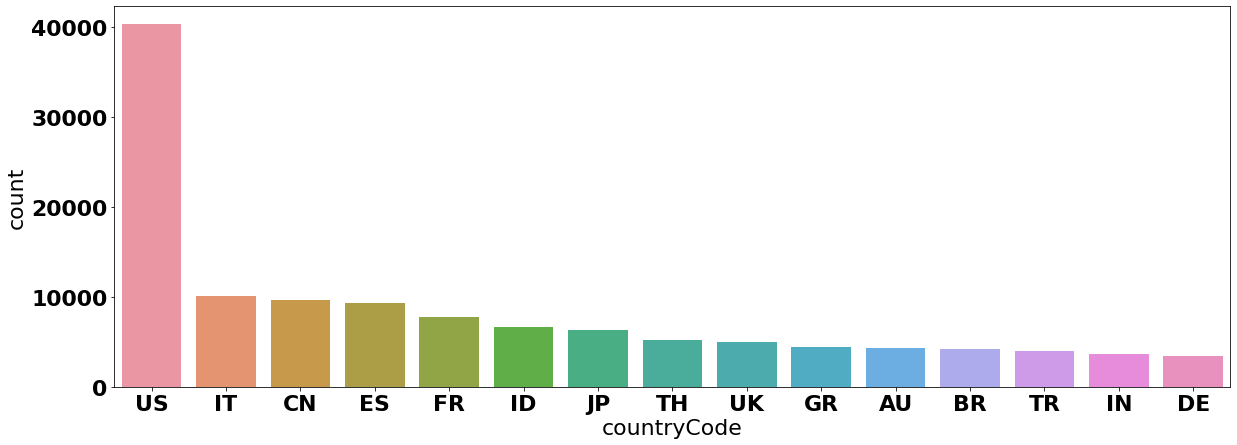

In [18]:
countplt, ax = plt.subplots(figsize = (20,7))
ax = sns.countplot(x="countryCode", data=inventory, order=inventory.countryCode.value_counts().iloc[:15].index)

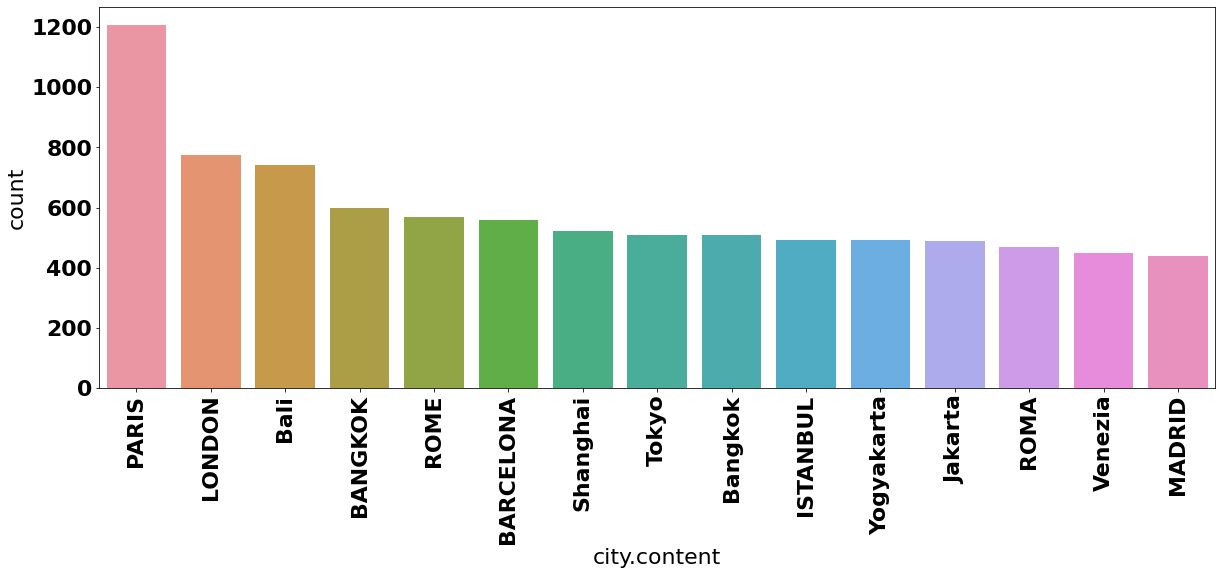

In [19]:
countplt, ax = plt.subplots(figsize = (20,7))
ax = sns.countplot(x="city.content", data=inventory, order=inventory["city.content"].value_counts().iloc[:15].index)
ax = plt.xticks(rotation=90)

In [20]:
accommodation = inventory['accommodationTypeCode'].astype(str).value_counts()
accommodation

H      153219
A        3070
W        2040
K        1684
P        1508
G        1393
Q        1045
S        1012
M         727
N         581
D         342
O         295
V         284
Z         269
C         170
Y         142
nan       141
R         120
T          86
E          83
X          61
I          56
B           8
L           2
U           1
Name: accommodationTypeCode, dtype: int64

Legend:  
    A - Apartment  
    B - Botel  
    C - Vacation condo or apartment  
    D - Lodge  
    E - Camping  
    G - Guest house  
    H - Hotel  
    I - Riad  
    K - Bed and breakfast  
    M - Motel  
    N - Residence  
    O - Pousada  
    P - Aparthotel  
    Q - Boutique  
    R - Vacation resort  
    S - Hostel  
    T - Vacation Townhouse  
    U - Cruise  
    V - Vacation home or villa  
    W - Resort  
    X - Historical hotel Luxurious  
    Y - Rural house  
    Z - Rural hotel  

In [21]:
data = accommodation.reset_index(name='value').rename(columns={'index': 'accommodation'})
data['angle'] = data['value']/data['value'].sum() * 2*pi
data['color'] = turbo(len(accommodation))
data['percent'] = data['value']/sum(accommodation)

p = figure(height=350, title="Accommodation type", toolbar_location=None,
           tools="hover", tooltips="@accommodation: @value @percent{0.00%}", x_range=(-0.5, 1.0))

p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend_field='accommodation', source=data)

p.axis.axis_label = None
p.axis.visible = False
p.grid.grid_line_color = None

show(p)

In [22]:
s2c = inventory['S2C'].astype(str).value_counts()

In [23]:
s2c

nan       102220
4*         35119
3*         17050
2*         10428
1*          3457
denied        65
Name: S2C, dtype: int64

In [24]:
data = s2c.reset_index(name='value').rename(columns={'index': 'stars'})
data['angle'] = data['value']/data['value'].sum() * 2*pi
data['color'] = Category20c[len(s2c)]
data['percent'] = data['value']/sum(s2c)

p = figure(height=350, title="Hotels stars nmb", toolbar_location=None,
           tools="hover", tooltips="@stars: @value @percent{0.00%}", x_range=(-0.5, 1.0))

p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend_field='stars', source=data)

p.axis.axis_label = None
p.axis.visible = False
p.grid.grid_line_color = None

show(p)

In [25]:
inventory['chainCode'].astype(str).value_counts()

nan      84887
WYNDH     7353
HILTO     6710
CHOIC     6180
INTCO     5886
         ...  
EMPER        1
KYOTO        1
ALPPA        1
BREND        1
PRIMA        1
Name: chainCode, Length: 2660, dtype: int64

In [26]:
inventory['chainCode'] = inventory['chainCode'].astype(str)

<ipython-input-26-169803bc7792>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inventory['chainCode'] = inventory['chainCode'].astype(str)


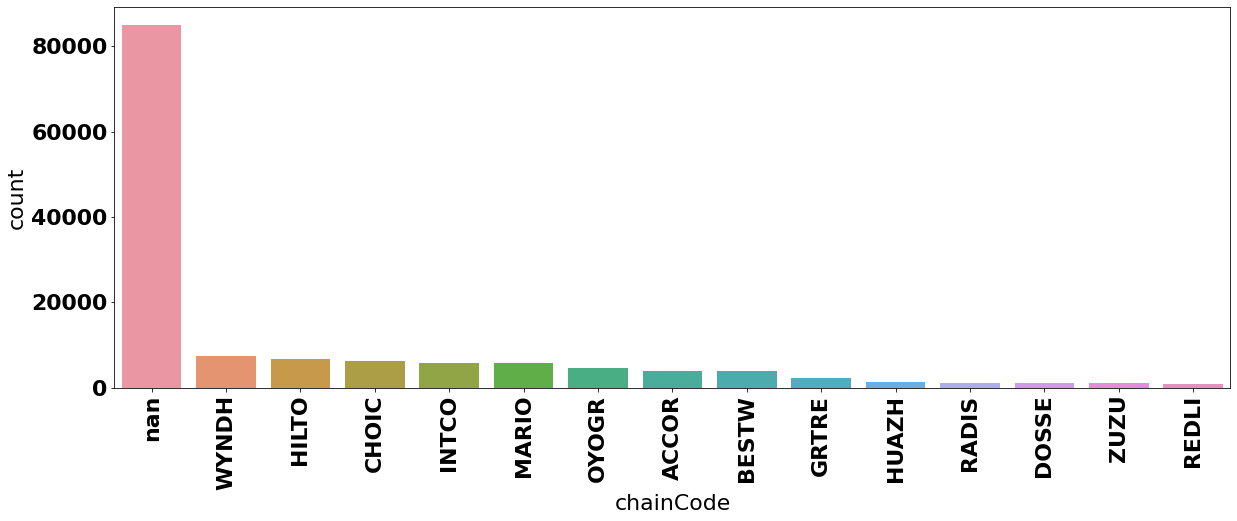

In [27]:
countplt, ax = plt.subplots(figsize = (20,7))
ax = sns.countplot(x="chainCode", data=inventory, order=inventory["chainCode"].value_counts().iloc[:15].index)
ax = plt.xticks(rotation=90)

In [28]:
wyndham = inventory[inventory["chainCode"] == "WYNDH"]
accor = inventory[inventory["chainCode"] == "ACCOR"]
red_lions = inventory[inventory["chainCode"] == "REDLI"]
mariot = inventory[inventory["chainCode"] == "MARIO"]

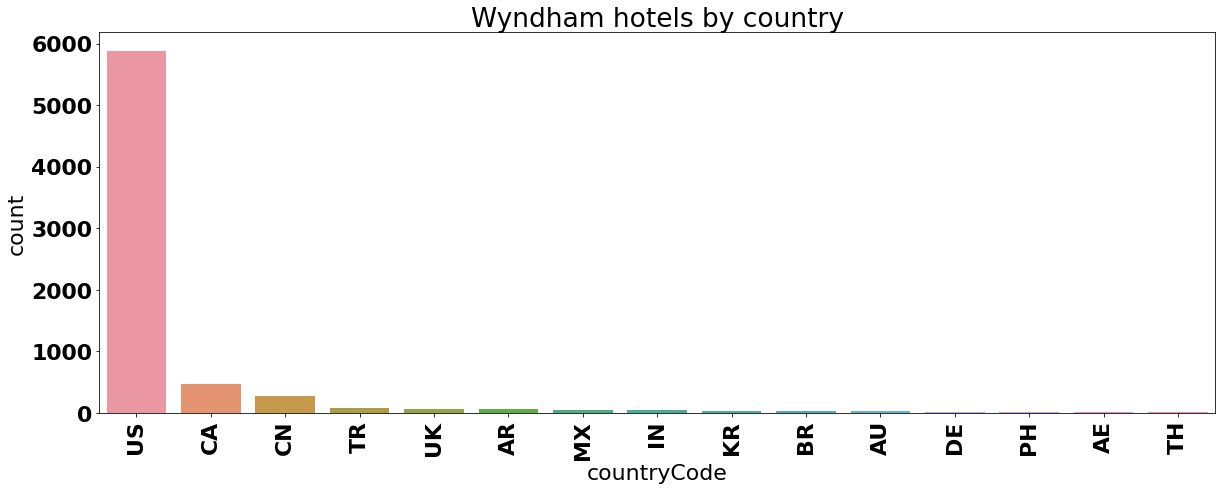

In [29]:
countplt, ax = plt.subplots(figsize = (20,7))
ax = sns.countplot(x="countryCode", data=wyndham, order=wyndham["countryCode"].value_counts().iloc[:15].index).set(title='Wyndham hotels by country')
ax = plt.xticks(rotation=90)

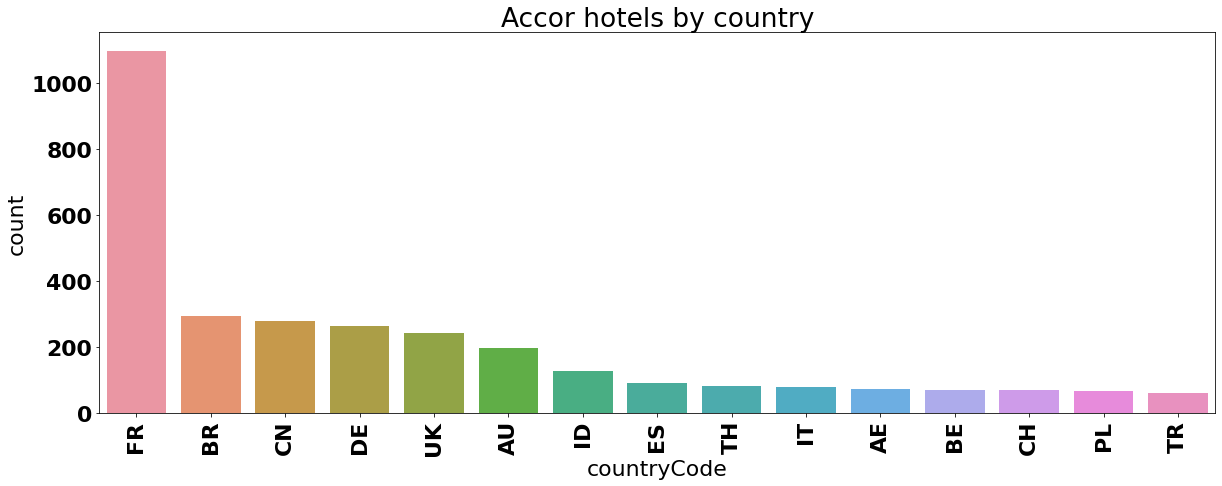

In [30]:
countplt, ax = plt.subplots(figsize = (20,7))
ax = sns.countplot(x="countryCode", data=accor, order=accor["countryCode"].value_counts().iloc[:15].index).set(title='Accor hotels by country')
ax = plt.xticks(rotation=90)

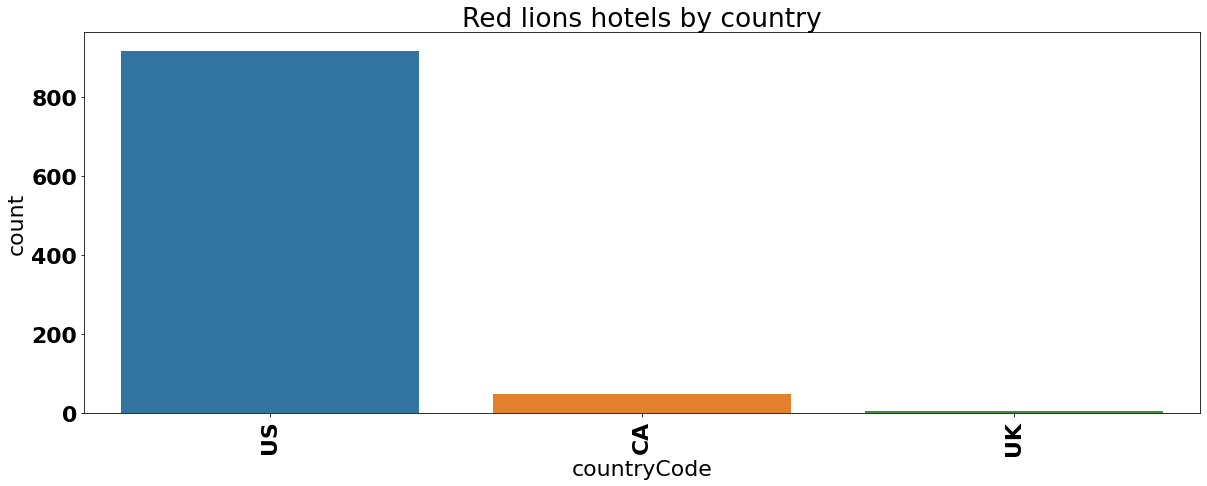

In [31]:
countplt, ax = plt.subplots(figsize = (20,7))
ax = sns.countplot(x="countryCode", data=red_lions, order=red_lions["countryCode"].value_counts().iloc[:15].index).set(title='Red lions hotels by country')
ax = plt.xticks(rotation=90)

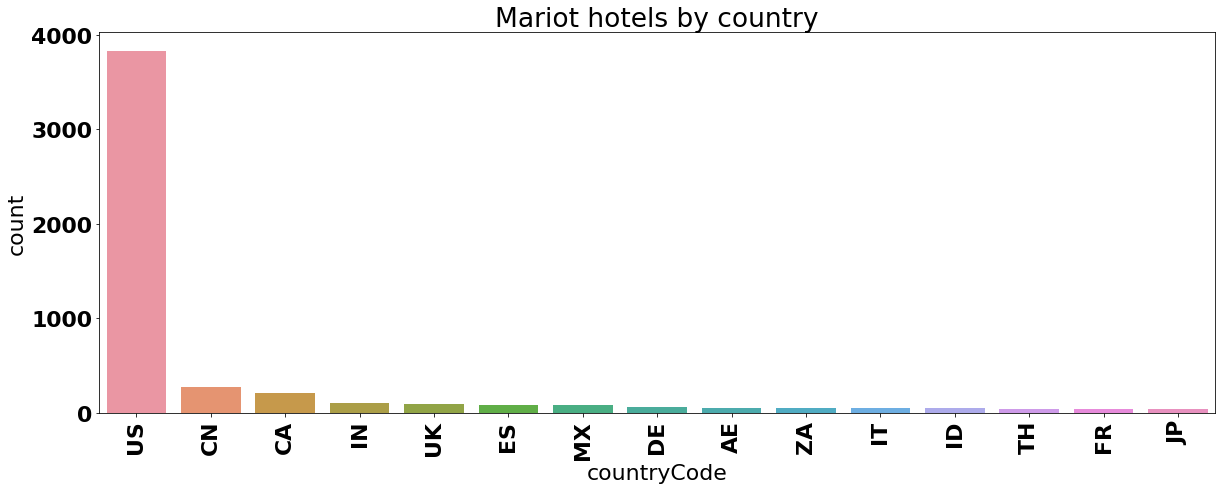

In [32]:
countplt, ax = plt.subplots(figsize = (20,7))
ax = sns.countplot(x="countryCode", data=mariot, order=mariot["countryCode"].value_counts().iloc[:15].index).set(title='Mariot hotels by country')
ax = plt.xticks(rotation=90)

In [33]:
inProj = Proj(init='epsg:3857')
outProj = Proj(init='epsg:4326')

/home/michal/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/home/michal/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [34]:
def calculate_mercator_points(inv, country_code):
    print
    country_inv = inv[inv["countryCode"] == country_code]
    lons, lats = [], []
    for lon, lat in list(zip(country_inv["coordinates.longitude"], country_inv["coordinates.latitude"])):
        x, y = transform(outProj,inProj,lon,lat)
        lons.append(x)
        lats.append(y)
    country_inv["MercatorX"] = lons
    country_inv["MercatorY"] = lats
    return country_inv

In [35]:
italy = calculate_mercator_points(inventory, "IT")
spain = calculate_mercator_points(inventory, "ES")
united_states = calculate_mercator_points(inventory, "US")
china = calculate_mercator_points(inventory, "CN")
france = calculate_mercator_points(inventory, "FR")

<ipython-input-34-aa8c3169a43c>:6: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x, y = transform(outProj,inProj,lon,lat)
<ipython-input-34-aa8c3169a43c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_inv["MercatorX"] = lons
<ipython-input-34-aa8c3169a43c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_inv["MercatorY"] = lats


In [36]:
def make_map(country_inv, x_min, x_max, y_min, y_max):
    osm = get_provider("OSM")

    # range bounds supplied in web mercator coordinates
    p = figure(x_range=(x_min, x_max), y_range=(y_min, y_max),
               x_axis_type="mercator", y_axis_type="mercator",
               tooltips=[
                        ("name", "@{name.content}"), ("address", "@{address.content}"), ("(Long, Lat)", "(@{coordinates.longitude}, @{coordinates.latitude})")
                        ],)
    p.add_tile(osm)

    p.circle(x="MercatorX", y="MercatorY",
             size=2,
             fill_color="dodgerblue", line_color="dodgerblue",
             fill_alpha=0.3,
             source=country_inv)

    show(p)

In [37]:
make_map(italy, 510000, 2200000, 4300000, 6000000)

In [ ]:
make_map(spain, -2113750, 510805, 3198635, 5419133)

In [ ]:
make_map(china, 8237642, 15028131, 2037548, 7361866)

In [ ]:
make_map(france, 50000, 500000, 5000000, 6800000)

# Sum up

1. There are 336 duplicated properties coming from HotelBeds dev data. 
2. Around quater of all properties all from United States, next countries are Italy, China, Spain and France.  
3. City with the biggest number of properties around 1200 is Paris, followed by London, Bangkok and Rome.
4. Dominant property type is hotel (around 90%) next are Apartment and Resort.
5. Most properties does not have data about stars number (around 60%). Apart from them respectively 20% are four star and 10% are three star.
6. Half of properties does not have data about chain. Apart from them most popular chains are Wyndham, Hilton and Choice.